In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([[1, 0, 1, 1, 0, 0, 0, 0, 0, 0], #1번 유저의 1~10번 레시피 선호도
                [0, 1, 0, 0, 1, np.nan, 0, 0, 0, 1], #2번 유저
                [1, np.nan, 1, 1, 1, 0, 1, 0, 0, 0],
                [0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
                [1, 1, 0, np.nan, 0, 0, 0, 0, 1, 0],
                [1, 0, 1, 0, 1, np.nan, 1, 1, 0, 0],
                [0, 0, 0, 1, 1, 0, 1, 0, 1, 1],
                [np.nan, 1, 0, 0, np.nan, 1, 0, 1, 0, 0],
                [0, np.nan, 0, 1, 0, 0, 0, 1, 0, 0],
                [1, 0, 0, 0, 1, 1, 0, 1, np.nan, 1], #10번 유저
                [1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
                [0, np.nan, np.nan, np.nan, 1, np.nan, 1, 1, np.nan, np.nan],
                [0, 0, 0, 0, 1, 0, 1, np.nan, 0, 1],
                [1, np.nan, 0, 0, np.nan, 1, 1, 0, 1, 1]]) 

(array([[ 0.27,  0.45,  0.16, -0.27,  0.86],
        [ 0.91,  0.48,  0.16,  0.45, -0.07],
        [ 0.1 ,  1.05,  0.04,  0.17,  0.92],
        [ 0.78,  0.32,  0.63,  0.48, -0.16],
        [ 1.01,  0.01, -0.1 ,  0.04,  1.03],
        [-0.3 ,  0.49,  0.8 ,  0.44,  0.48],
        [ 0.99,  0.91, -0.42,  0.72,  0.58],
        [ 0.41, -0.14,  0.81,  0.03,  0.22],
        [ 0.53,  0.17,  0.22, -0.18,  0.32],
        [ 0.71,  1.  ,  0.92, -0.04, -0.06],
        [ 0.2 , -0.29,  0.57,  1.05,  0.75],
        [ 0.53,  0.65,  0.54,  0.85, -0.18],
        [ 0.34,  0.73, -0.14,  0.7 ,  0.  ],
        [ 0.75,  0.15,  0.19,  1.03,  0.56]]),
 array([[-0.05,  0.87, -0.63,  0.39,  0.07,  0.17, -0.49,  0.15,  0.32,
          0.52],
        [ 0.06, -0.81,  0.29,  0.23,  0.94, -0.1 ,  0.5 , -0.05, -0.54,
          0.27],
        [ 0.75,  0.48,  0.37, -0.33,  0.22,  1.06, -0.04,  1.18, -0.39,
          0.15],
        [-0.08,  0.37,  0.18, -0.5 ,  0.48,  0.49,  1.02,  0.11,  0.56,
          0.83],
        [ 1.

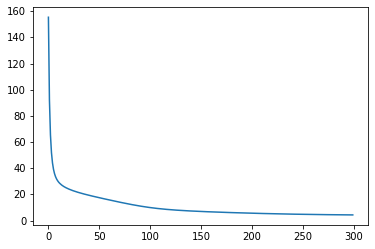

In [3]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

def predict(Theta, X): #행렬곱으로 예측값 계산하는 함수
    return Theta @ X

def cost(prediction, R): #손실함수(비용함수) 평균제곱오차(MSE) 계산
    return np.nansum((prediction - R)**2)

def initialize(R, num_features): #랜덤값을 채워 임의의 theta, x를 만들어주는 함수
    num_users, num_items = R.shape    
    Theta = np.random.rand(num_users, num_features)
    X = np.random.rand(num_features, num_items)   
    return Theta, X

#평점 데이터 행렬 R, 유저 행렬 Theta, 레시피 행렬 X, 경사 하강 횟수 iteration, 학습률 alpha, 그리고 정규화 상수 lambda_
def gradient_descent(R, Theta, X, iteration, alpha, lambda_):
    num_user, num_items = R.shape
    num_features = len(X) 
    costs = []  #손실계산값을 담을 리스트
    for _ in range(iteration):
        prediction = predict(Theta, X) #예측값 계산
        error = prediction - R #오차 계산
        costs.append(cost(prediction, R)) #손실을 costs 리스트에 추가

        for i in range(num_user):
            for j in range(num_items):
                if not np.isnan(R[i][j]): #실제 데이터 평점이 없는값은 건너뛰기
                    for k in range(num_features):
                        Theta[i][k] -= alpha * (np.nansum(error[i, :]*X[k, :]) + lambda_*Theta[i][k])
                        X[k][j] -= alpha * (np.nansum(error[:, j]*Theta[:, k]) + lambda_*X[k][j])
                        
    return Theta, X, costs


R = data        
Theta, X = initialize(R, 5)  #행렬들 초기화
Theta, X, costs = gradient_descent(R, Theta, X, 300, 0.001, 0.01)  #경사 하강
    
plt.plot(costs)

Theta, X

In [4]:
result = Theta @ X
print('기존 data:\n', data)
print('머신러닝으로 추측:\n', result)

기존 data:
 [[ 1.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. nan  0.  0.  0.  1.]
 [ 1. nan  1.  1.  1.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  1.  0.  1.  0.  1.]
 [ 1.  1.  0. nan  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  1.  0.  1. nan  1.  1.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  1.  0.  1.  1.]
 [nan  1.  0.  0. nan  1.  0.  1.  0.  0.]
 [ 0. nan  0.  1.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  1.  1.  0.  1. nan  1.]
 [ 1.  1.  1.  0.  0.  1.  1.  1.  1.  1.]
 [ 0. nan nan nan  1. nan  1.  1. nan nan]
 [ 0.  0.  0.  0.  1.  0.  1. nan  0.  1.]
 [ 1. nan  0.  0. nan  1.  1.  0.  1.  1.]]
머신러닝으로 추측:
 [[ 1.01 -0.08  0.65  1.06  0.17 -0.01  0.16  0.19  0.13 -0.29]
 [ 0.    0.64 -0.34  0.12  0.78  0.5   0.21  0.36  0.18  1.03]
 [ 0.99 -0.59  1.01  1.    0.89 -0.01  1.01  0.04  0.08  0.1 ]
 [ 0.25  0.89 -0.21 -0.22  0.76  1.01  0.16  0.9   0.01  1.05]
 [ 0.89  0.94  0.14  1.32 -0.14  0.03 -0.04  0.05  0.97  0.12]
 [ 1.09 -0.06  1.08 -0.06  0.73  0.94  1.    0.93 -0.15  0.2

In [5]:
num_user, num_items = data.shape
for i in range(num_user):
    for j in range(num_items):
        if np.isnan(data[i][j]):
            if result[i][j] > 0.5:
                print("%d 번 유저에게 추천하는 레시피: %d"%(i+1,j))

2 번 유저에게 추천하는 레시피: 5
5 번 유저에게 추천하는 레시피: 3
6 번 유저에게 추천하는 레시피: 5
8 번 유저에게 추천하는 레시피: 0
12 번 유저에게 추천하는 레시피: 5
12 번 유저에게 추천하는 레시피: 9
14 번 유저에게 추천하는 레시피: 1
14 번 유저에게 추천하는 레시피: 4
